In [44]:
# load libraries
from pathlib import Path
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
methods = ['velocyto',
           'scvelo_dy',
           'scvelo_st',
           'veloae',
           'dynamo',
           'unitvelo_ind',
           'unitvelo_uni',
           'velovae',
           'velovae_full',
           'deepvelo_gcn',
           'celldancer',
           'pyro_model1',
           'pyro_model2',
           'kappa',
           'velovi',
           'sdevelo',
           'cell2fate',
           'svelvetvae', 
           'latentvelo', 
           'tivelo',
           'tivelo_simple',
           'sctour_mse',
           'sctour_nb', 
           'sctour_zinb', 
           'graphvelo']

newmethods = {
    'unitvelo_ind': 'UniTVelo (ind)',
    'velovi': 'veloVI',
    'cell2fate': 'cell2fate',
    'latentvelo_std': 'LatentVelo (std)',
    'pyrovelocity_m1': 'Pyro-velocity (m1)',
    'pyrovelocity_m2': 'Pyro-velocity (m2)',
    'sctour_mse': 'scTour (MSE)',
    'sctour_nb': 'scTour (NB)',
    'sctour_zinb': 'scTour (ZINB)',
    'scvelo_dyn': 'scVelo (dyn)',
    'unitvelo_uni': 'UniTVelo (uni)',
    'deepvelo': 'DeepVelo',
    'svelvetvae': 'SvelvetVAE',
    'tivelo_std': 'TIVelo (std)',
    'tivelo_simple': 'TIVelo (simple)',
    'velocyto': 'Velocyto',
    'veloae': 'VeloAE',
    'velovae_std': 'VeloVAE (std)',
    'velovae_fullvb': 'VeloVAE (Full VB)',
    'kvelo': 'κ-velo',
    'celldancer': 'cellDancer',
    'dynamo_m1': 'Dynamo (m1)',
    'graphvelo_std': 'GraphVelo (std)',
    'scvelo_stc': 'scVelo (stc)',
    'sdevelo': 'SDEvelo'
}

boxout_colors = {
    'unitvelo_ind': '#3C779F',
    'velovi': '#3C779F',
    'scvelo_dyn': '#3C779F',
    'cell2fate': '#A35C72',
    'latentvelo_std': '#A35C72',
    'pyrovelocity_m1': '#A35C72',
    'pyrovelocity_m2': '#A35C72',
    'sctour_mse': '#A35C72',
    'sctour_nb': '#A35C72',
    'sctour_zinb': '#A35C72',
    'unitvelo_uni': '#A35C72',
    'deepvelo': '#E8B86C',
    'svelvetvae': '#E8B86C',
    'tivelo_std': '#E8B86C',
    'tivelo_simple': '#E8B86C',
    'velocyto': '#E8B86C',
    'veloae': '#E8B86C',
    'velovae_std': '#E8B86C',
    'velovae_fullvb': '#E8B86C',
    'kvelo': '#E8B86C',
    'celldancer': '#E8B86C',
    'dynamo_m1': '#E8B86C',
    'graphvelo_std': '#E8B86C',
    'scvelo_stc': '#E8B86C',
    'sdevelo': '#799540'        
}

dataset_names = ['data03','data07', 'data08','data09','data10']

dataset_ids = ['Data 3','Data 7','Data 8','Data 9','Data 10']

In [46]:
metric = 'cto'

all_dfs = []
for dataset_name in dataset_names:
    df = pd.read_csv(f'./{dataset_name}/{metric}_df.csv')
    all_dfs.append(df)

method_avg_df = pd.DataFrame()

for i, df in enumerate(all_dfs):

    fold_columns = [col for col in df.columns if col != 'Method']
    
    method_avg = df.groupby('Method')[fold_columns].mean().mean(axis=1).reset_index()
    method_avg.columns = ['Method', f'{dataset_names[i]}_avg']
    
    if method_avg_df.empty:
        method_avg_df = method_avg
    else:
        method_avg_df = method_avg_df.merge(method_avg, on='Method', how='outer')

method_avg_df['overall_avg'] = method_avg_df.iloc[:, 1:].mean(axis=1)
method_avg_df = method_avg_df.sort_values('overall_avg', ascending=False).reset_index(drop=True)
method_avg_df['rank'] = range(1, len(method_avg_df) + 1)

/tmp/ipykernel_84826/1283409072.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_84826/1283409072.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(method_order_with_rank, fontsize=12)
/tmp/ipykernel_84826/1283409072.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_84826/1283409072.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(method_order_with_rank, fontsize=12)
/tmp/ipykernel_84826/1283409072.py:26: FutureWarning: 

Passing `palette` wi

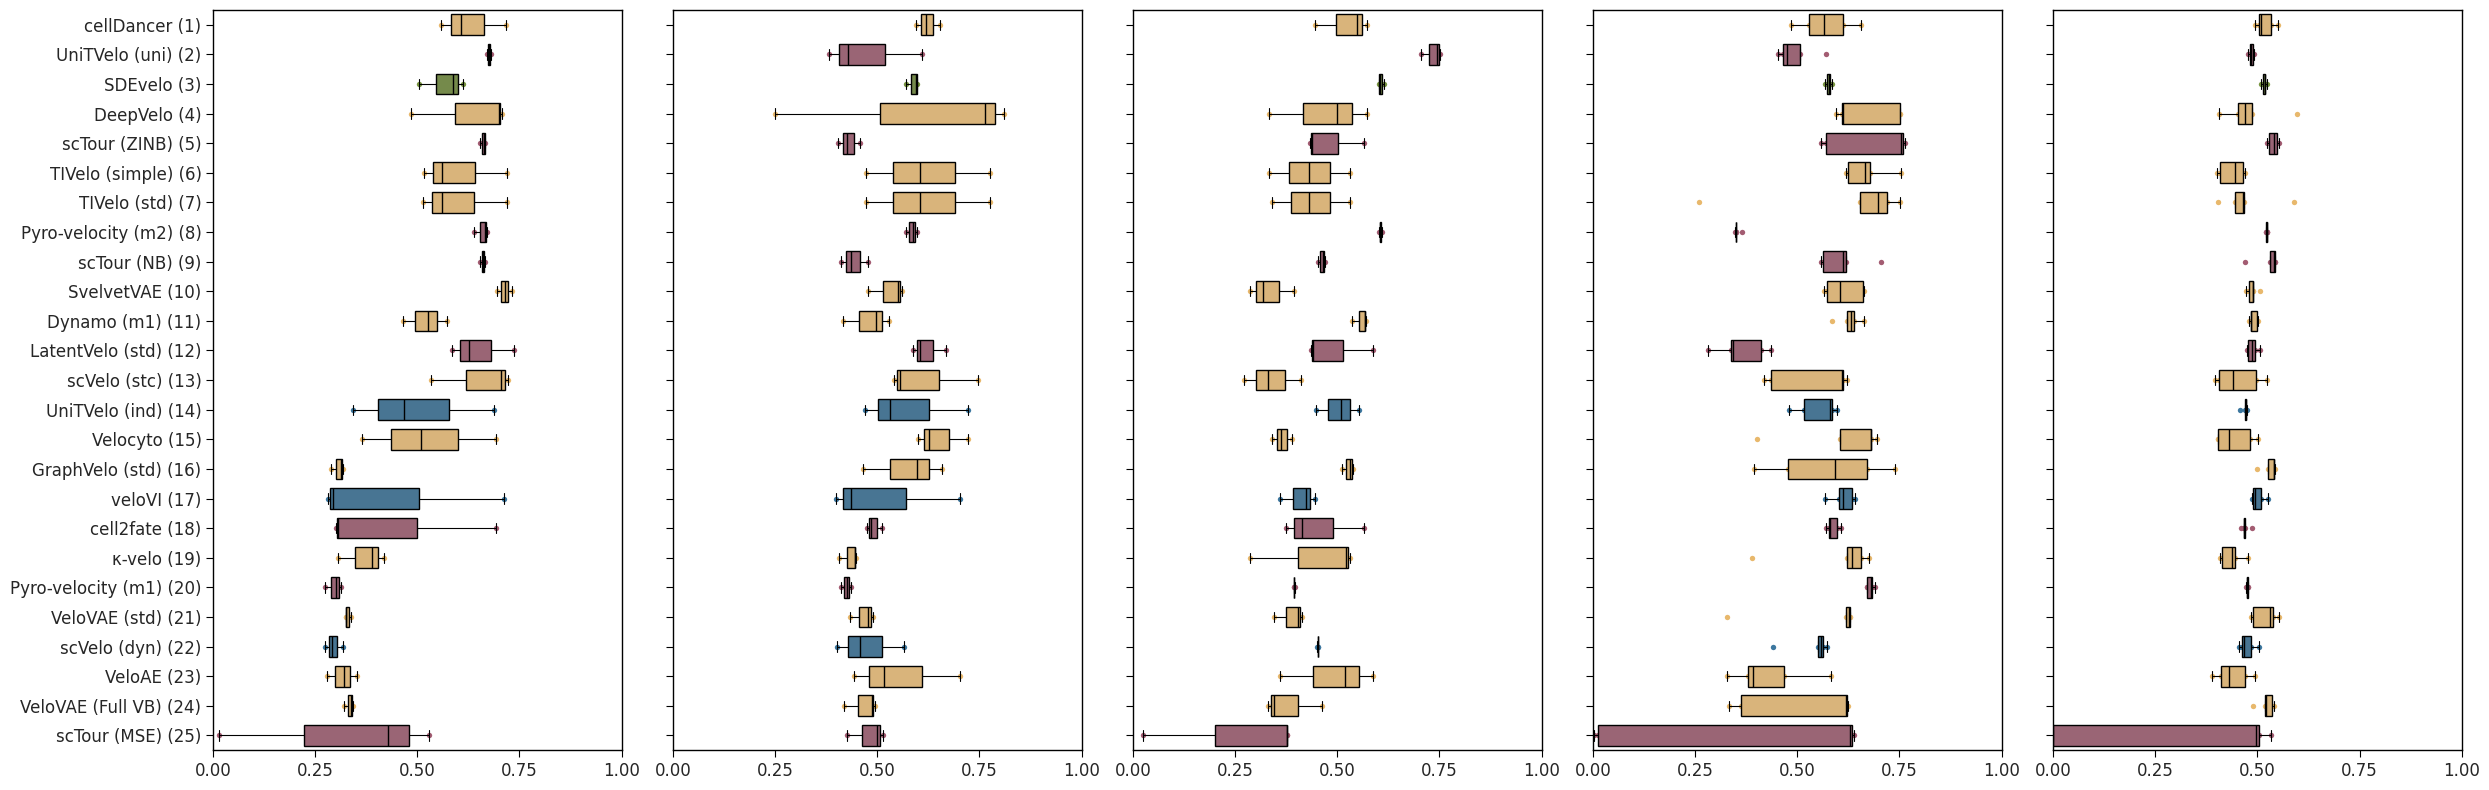

In [47]:
sns.set_style("white")

fig, axes = plt.subplots(1, 5, figsize=(25,8), sharey=True)

for index, ax in enumerate(axes):
    first_dataset_df = all_dfs[index].copy()
    fold_columns = [col for col in first_dataset_df.columns if col != 'Method']
    melted_df = first_dataset_df.melt(id_vars=['Method'],
                                      value_vars=fold_columns,
                                      var_name='fold',
                                      value_name='value')


    method_order = method_avg_df.sort_values('rank', ascending=False)['Method'].tolist()
    melted_df['Method'] = pd.Categorical(melted_df['Method'], categories=method_order, ordered=True)
    melted_df = melted_df.sort_values('Method')
    melted_df['Method_mapped'] = melted_df['Method'].map(newmethods)
    method_order_mapped = [newmethods[m] for m in method_order]
    rank_map = method_avg_df.set_index("Method")["rank"].to_dict()
    method_order_with_rank = [
        f"{newmethods[m]} ({rank_map[m]})" for m in method_order
    ]

    box_edge_colors = [boxout_colors[m] for m in method_order]

    sns.boxplot(
        data=melted_df, 
        x='value', 
        y='Method_mapped', 
        orient='h',
        palette=box_edge_colors,
        width=0.7,
        boxprops=dict(edgecolor='black', linewidth=1),
        whiskerprops=dict(color='black', linewidth=0.8),
        capprops=dict(color='black', linewidth=0.8),
        medianprops=dict(color='black', linewidth=1),
        ax=ax,
        showfliers=False
    )

    for i, method in enumerate(method_order_mapped):
        method_data = melted_df[melted_df['Method_mapped'] == method]
        ax.scatter(method_data['value'],
                   [i] * len(method_data),
                   color=box_edge_colors[i],
                   alpha=1.0,
                   s=15,
                   edgecolors='black',
                   linewidth=0,
                   zorder=0)
    
    ax.tick_params(
        axis='x',
        direction='out',
        length=5,
        color='black',
        labelsize=10,
        bottom=True, top=False
    )

    ax.tick_params(
        axis='y',
        direction='out',
        length=5,
        color='black',
        left=True, right=False
    )

    ax.xaxis.set_tick_params(which='both', bottom=True)
    ax.yaxis.set_tick_params(which='both', left=True)

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.5, len(method_order_mapped) - 0.5)
    ax.set_xticks([0.00, 0.25, 0.50, 0.75, 1.00])
    ax.tick_params(axis='x', labelsize=12)

    ax.set_yticklabels(method_order_with_rank, fontsize=12)

    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)

    # ax.grid(True, linestyle='--', axis='x', color='lightgray', alpha=0.7, zorder=0)

    ax.set_ylabel('')
    ax.set_xlabel('')

plt.tight_layout()

plt.savefig(f"combined_boxplots_{metric}.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()


In [48]:
metric = 'spearman'

all_dfs = []
for dataset_name in dataset_names:
    df = pd.read_csv(f'./{dataset_name}/{metric}_df.csv')
    all_dfs.append(df)

method_avg_df = pd.DataFrame()

for i, df in enumerate(all_dfs):

    fold_columns = [col for col in df.columns if col != 'Method']
    
    method_avg = df.groupby('Method')[fold_columns].mean().mean(axis=1).reset_index()
    method_avg.columns = ['Method', f'{dataset_names[i]}_avg']
    
    if method_avg_df.empty:
        method_avg_df = method_avg
    else:
        method_avg_df = method_avg_df.merge(method_avg, on='Method', how='outer')

method_avg_df['overall_avg'] = method_avg_df.iloc[:, 1:].mean(axis=1)
method_avg_df = method_avg_df.sort_values('overall_avg', ascending=False).reset_index(drop=True)
method_avg_df['rank'] = range(1, len(method_avg_df) + 1)

/tmp/ipykernel_84826/2871169645.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_84826/2871169645.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(method_order_with_rank, fontsize=12)
/tmp/ipykernel_84826/2871169645.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


/tmp/ipykernel_84826/2871169645.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(method_order_with_rank, fontsize=12)
/tmp/ipykernel_84826/2871169645.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_84826/2871169645.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(method_order_with_rank, fontsize=12)
/tmp/ipykernel_84826/2871169645.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_84826/2871169645.py:76: UserWarning: set_ticklabels() should 

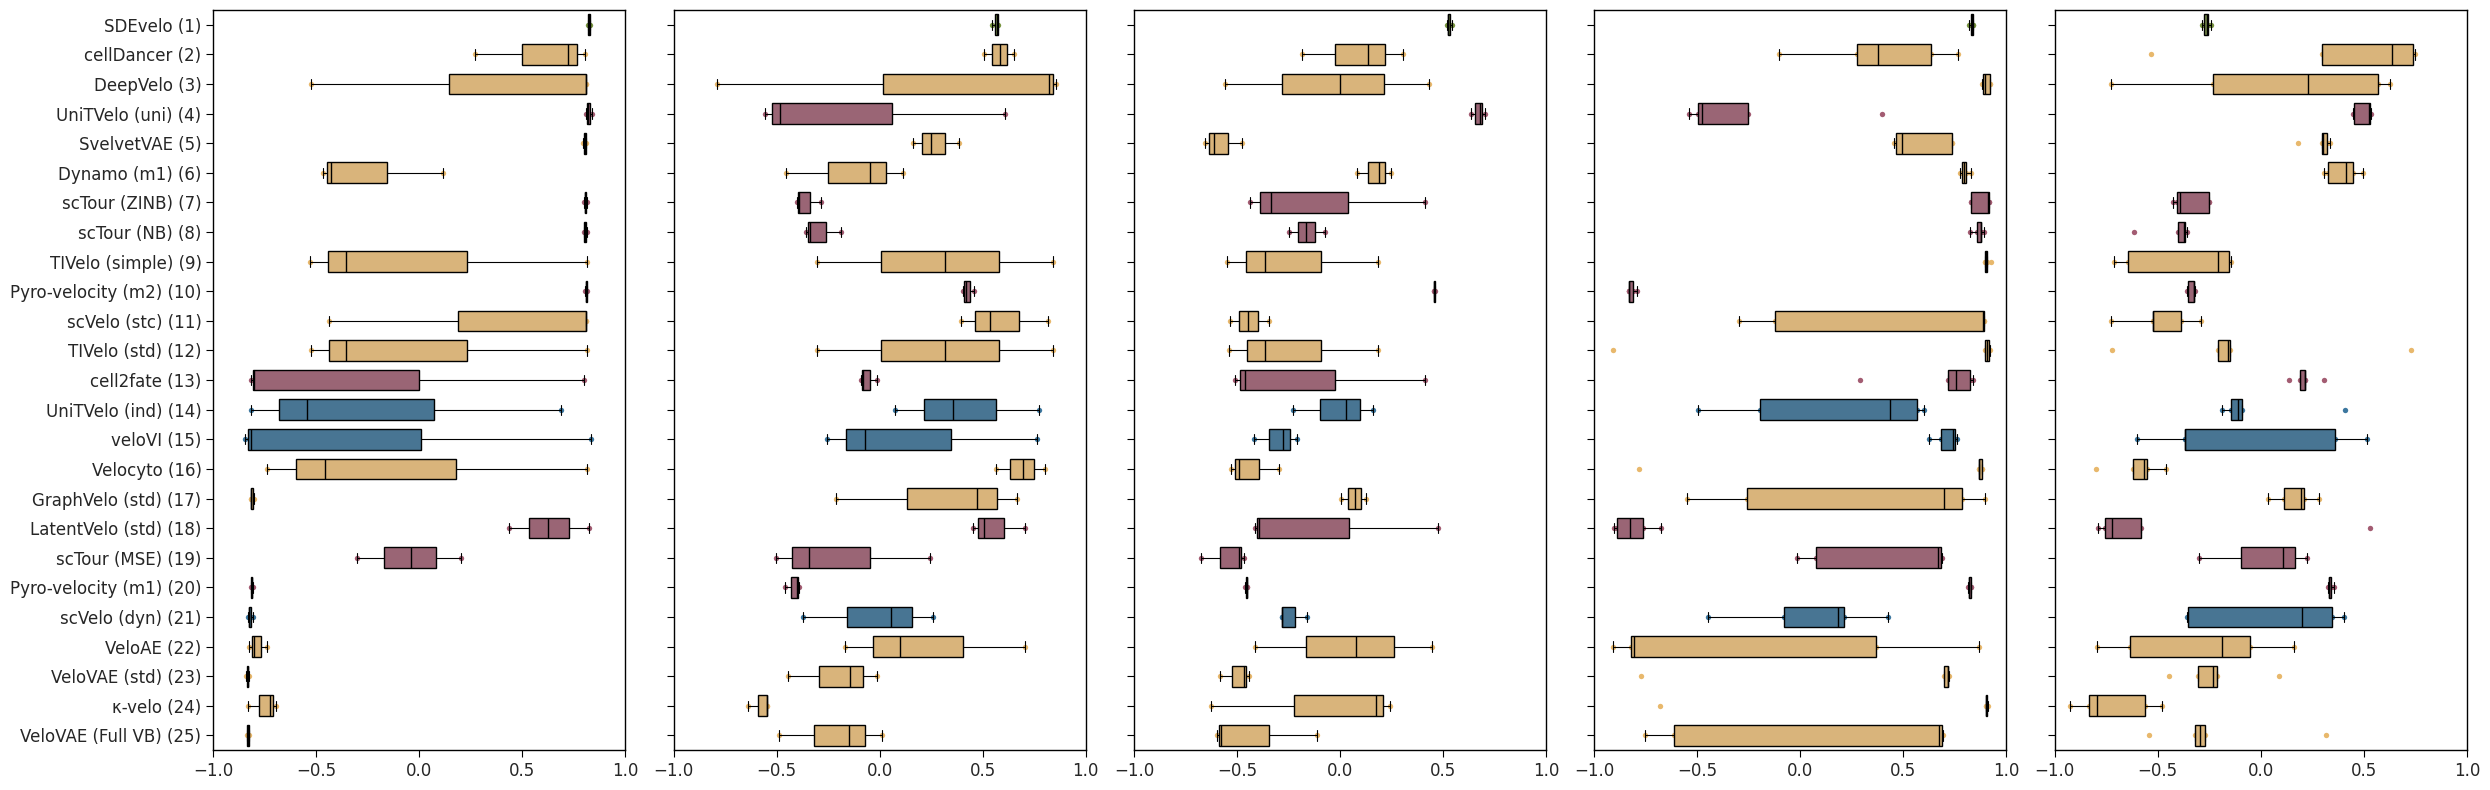

In [49]:
sns.set_style("white")

fig, axes = plt.subplots(1, 5, figsize=(25,8), sharey=True)

for index, ax in enumerate(axes):
    first_dataset_df = all_dfs[index].copy()
    fold_columns = [col for col in first_dataset_df.columns if col != 'Method']
    melted_df = first_dataset_df.melt(id_vars=['Method'],
                                      value_vars=fold_columns,
                                      var_name='fold',
                                      value_name='value')

    method_order = method_avg_df.sort_values('rank', ascending=False)['Method'].tolist()
    melted_df['Method'] = pd.Categorical(melted_df['Method'], categories=method_order, ordered=True)
    melted_df = melted_df.sort_values('Method')
    melted_df['Method_mapped'] = melted_df['Method'].map(newmethods)
    method_order_mapped = [newmethods[m] for m in method_order]

    rank_map = method_avg_df.set_index("Method")["rank"].to_dict()
    method_order_with_rank = [
        f"{newmethods[m]} ({rank_map[m]})" for m in method_order
    ]

    box_edge_colors = [boxout_colors[m] for m in method_order]

    sns.boxplot(
        data=melted_df, 
        x='value', 
        y='Method_mapped', 
        orient='h',
        palette=box_edge_colors,
        width=0.7,
        boxprops=dict(edgecolor='black', linewidth=1),
        whiskerprops=dict(color='black', linewidth=0.8),
        capprops=dict(color='black', linewidth=0.8),
        medianprops=dict(color='black', linewidth=1),
        ax=ax,
        showfliers=False
    )

    for i, method in enumerate(method_order_mapped):
        method_data = melted_df[melted_df['Method_mapped'] == method]
        ax.scatter(method_data['value'],
                   [i] * len(method_data),
                   color=box_edge_colors[i],
                   alpha=1.0,
                   s=15,
                   edgecolors='black',
                   linewidth=0,
                   zorder=0)
    
    ax.tick_params(
        axis='x',
        direction='out',
        length=5,
        color='black',
        labelsize=10,
        bottom=True, top=False
    )

    ax.tick_params(
        axis='y',
        direction='out',
        length=5,
        color='black',
        left=True, right=False
    )

    ax.xaxis.set_tick_params(which='both', bottom=True)
    ax.yaxis.set_tick_params(which='both', left=True)

    ax.set_xlim(-1, 1)
    ax.set_ylim(-0.5, len(method_order_mapped) - 0.5)
    ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
    ax.tick_params(axis='x', labelsize=12)
    ax.set_yticklabels(method_order_with_rank, fontsize=12)

    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)

    # ax.grid(True, linestyle='--', axis='x', color='lightgray', alpha=0.7, zorder=0)

    ax.set_ylabel('')
    ax.set_xlabel('')

plt.tight_layout()

plt.savefig(f"combined_boxplots_{metric}.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()


In [50]:
df1 = pd.read_csv(f'df_1.csv')
df2 = pd.read_csv(f'df_2.csv')

In [51]:
method_class = {
    'cell2fate': 1,
    'latentvelo_std': 1,
    'pyrovelocity_m1': 1,
    'pyrovelocity_m2': 1,
    'sctour_mse': 1,
    'sctour_nb': 1,
    'sctour_zinb': 1,
    'unitvelo_uni': 1,
    'unitvelo_ind': 2,
    'velovi': 2,
    'scvelo_dyn': 2,
    'deepvelo': 3,
    'svelvetvae': 3,
    'tivelo_std': 3,
    'tivelo_simple': 3,
    'velocyto': 3,
    'veloae': 3,
    'velovae_std': 3,
    'velovae_fullvb': 3,
    'kvelo': 3,
    'celldancer': 3,
    'dynamo_ma': 3,
    'graphvelo': 3,
    'scvelo_stc': 3,
    'sdevelo': 4        
}

In [52]:
class_colors = {
    1: '#C05046',
    2: '#3C779F',
    3: '#E8B86C',
    4: '#799540'        
}

Spearman correlation: 0.907, p-value=4.175e-10


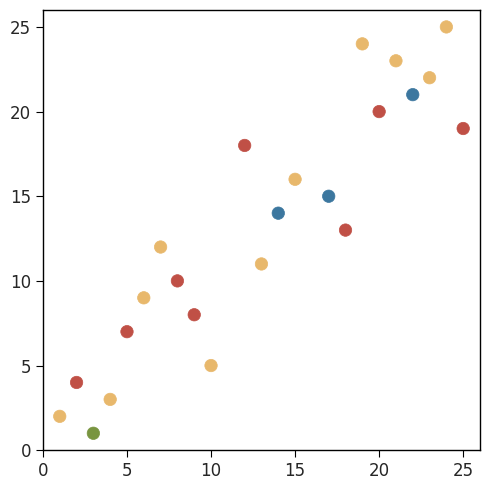

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

df2_ranked = df2.copy()
df2_ranked['rank_mean1'] = df2_ranked['mean_1'].rank(ascending=False, method='min')  # 越大越好
df2_ranked['rank_mean2'] = df2_ranked['mean_2'].rank(ascending=False, method='min')

df2_ranked['class'] = df2_ranked['Method'].map(method_class)

rho, pval = spearmanr(df2_ranked['rank_mean1'], df2_ranked['rank_mean2'])
print(f"Spearman correlation: {rho:.3f}, p-value={pval:.3e}")
plt.figure(figsize=(5, 5))
sns.set_style("white")

sns.scatterplot(
    data=df2_ranked,
    x='rank_mean1',
    y='rank_mean2',
    hue='class',
    palette=class_colors,
    s=80,
    edgecolor=None,
    linewidth=0.5,
    alpha=1.0,
    legend=False
)

plt.xlabel('', fontsize=13, labelpad=10)
plt.ylabel('', fontsize=13, labelpad=10)

lims = [
    min(df2_ranked['rank_mean1'].min(), df2_ranked['rank_mean2'].min())-1,
    max(df2_ranked['rank_mean1'].max(), df2_ranked['rank_mean2'].max())+1
]
plt.xlim(lims)
plt.ylim(lims)

x_ticks = np.arange(np.floor(lims[0]), np.ceil(lims[1]) + 1, 5)
y_ticks = np.arange(np.floor(lims[0]), np.ceil(lims[1]) + 1, 5)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(y_ticks, fontsize=12)

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

# plt.grid(True, linestyle='--', color='gray', alpha=0.4)

plt.tick_params(
    axis='both',
    which='both',
    direction='out',
    length=5,
    color='black',
    top=False, right=False,
    bottom = True, left=True
)
# for _, row in df_merge.iterrows():
#     plt.text(row['rank_df3'] + 0.15, row['rank_df1'], row['Method'],
#              fontsize=7, alpha=0.7)
plt.tight_layout()
plt.savefig(f"temporal_corr.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()

Spearman correlation: 0.146, p-value=4.869e-01


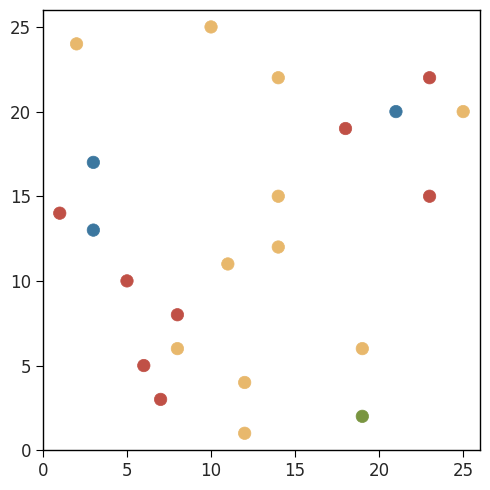

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_merge = df1[['Method', 'rank']].merge(
    df2[['Method', 'rank']], on='Method', suffixes=('_df1', '_df2')
)
df_merge['class'] = df_merge['Method'].map(method_class)

rho, pval = spearmanr(df_merge['rank_df1'], df_merge['rank_df2'])
print(f"Spearman correlation: {rho:.3f}, p-value={pval:.3e}")

plt.figure(figsize=(5, 5))


sns.set_style("white")

sns.scatterplot(
    data=df_merge,
    x='rank_df1',
    y='rank_df2',
    hue='class',
    palette=class_colors,
    s=80,
    edgecolor=None,
    linewidth=0.5,
    alpha=1.0,
    legend=False
)

plt.xlabel('', fontsize=12, labelpad=10)
plt.ylabel('', fontsize=12, labelpad=10)

lims = [
    min(df_merge['rank_df2'].min(), df_merge['rank_df1'].min()) - 1,
    max(df_merge['rank_df2'].max(), df_merge['rank_df1'].max()) + 1
]
plt.xlim(lims)
plt.ylim(lims)

x_ticks = np.arange(np.floor(lims[0]), np.ceil(lims[1]) + 1, 5)
y_ticks = np.arange(np.floor(lims[0]), np.ceil(lims[1]) + 1, 5)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(y_ticks, fontsize=12)

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

# plt.grid(True, linestyle='--', color='gray', alpha=0.4)

plt.tick_params(
    axis='both',
    which='both',
    direction='out',
    length=5,
    color='black',
    top=False, right=False,
    bottom = True, left=True
)
# for _, row in df_merge.iterrows():
#     plt.text(row['rank_df1'] + 0.15, row['rank_df3'], row['Method'],
#              fontsize=7, alpha=0.7)
plt.tight_layout()
plt.savefig(f"directional_temporal_correlation.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()
